In [0]:
from pyspark.mllib.linalg import SparseVector
from pyspark.mllib.regression import LabeledPoint

# Making Dataset

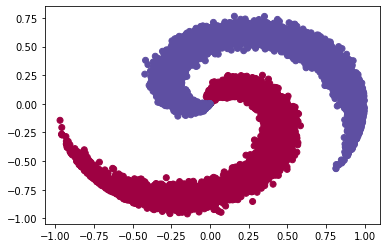

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a spiral dataset
n = 10000   # number of points per class
d = 3      # dimensionality(features)
k = 2     # number of classes

X = np.zeros((n*k,d))
y = np.zeros(n*k, dtype='uint8')

for j in range(k):
    ix = range(n*j,n*(j+1))
    r = np.linspace(0.0,1,n) # radius
    t = np.linspace(j*4,(j+1)*4,n) + np.random.randn(n)*0.2 # theta
    # For d>2, use a random angle for the additional dimensions
    if d > 2:
        a = np.random.uniform(0, 2*np.pi, n)
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t), r*np.sin(a)]
    else:
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.show()



##### Looking at output of data

In [0]:
X

Out[3]: array([[-0.00000000e+00,  0.00000000e+00, -0.00000000e+00],
       [ 7.48874239e-06,  9.97292286e-05,  7.77174331e-05],
       [ 2.78322674e-05,  1.98074143e-04, -1.94337687e-04],
       ...,
       [ 9.97718678e-01, -6.44782054e-02,  8.81393401e-01],
       [ 9.20250831e-01, -3.91073393e-01, -9.30603863e-01],
       [ 9.26194742e-01,  3.77045488e-01, -4.67663004e-01]])

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame()
df['y']= y

In [0]:
df['y'].unique()

Out[6]: array([0, 1], dtype=uint8)

### Converting Dataset into a pyspark dataframe

In [0]:
from pyspark.sql.types import ArrayType, StructField, StructType, FloatType, IntegerType

In [0]:
x = 0
data = list()
for i in X:
    data.append([float(i[0]), float(i[1]), float(i[2]), float(y[x])])
    x+=1
    
data
    


Out[8]: [[-0.0, 0.0, -0.0, 0.0],
 [7.48874238661552e-06, 9.97292286017841e-05, 7.771743314365286e-05, 0.0],
 [2.7832267366746937e-05,
  0.00019807414291973078,
  -0.00019433768650940157,
  0.0],
 [-7.75851335164462e-05, 0.0002898250330071495, -0.00021384626385509195, 0.0],
 [-1.4516891929821824e-05, 0.0003997765183816303, 0.00013726026077139425, 0.0],
 [0.00012039833898417226, 0.0004853393116891032, 0.0003467981772913661, 0.0],
 [5.034471963497891e-05, 0.0005979443285175599, -0.0005908562736883668, 0.0],
 [-0.00019363913202585968, 0.0006727569406927229, 0.00017056712147174206, 0.0],
 [1.2702570832143205e-05, 0.0007999791646641898, -6.35766540804616e-05, 0.0],
 [-1.9738015500003983e-05, 0.0008998735661454681, -0.0008482120742823035, 0.0],
 [-0.00025524360438679695, 0.0009669802130465942, -0.00055205585607637, 0.0],
 [-0.00011625563750940038, 0.0010939500276759095, -0.0006385853726480092, 0.0],
 [3.906820904952818e-05, 0.0011994839383032286, 0.0009792179598662064, 0.0],
 [-0.000171170400

In [0]:
from pyspark.sql.functions import monotonically_increasing_id

schema = StructType([
    StructField('X0', FloatType(), True),
    StructField('X1', FloatType(), True),
    StructField('X2', FloatType(), True),
    StructField('y', FloatType(), True)
])

myData = spark.sparkContext.parallelize(data)
df = spark.createDataFrame(myData,schema)
print(df.schema)
df = df.withColumn("id", monotonically_increasing_id())

StructType([StructField('X0', FloatType(), True), StructField('X1', FloatType(), True), StructField('X2', FloatType(), True), StructField('y', FloatType(), True)])


In [0]:
display(df)

X0 X1 X2 y id -0.0 0.0 -0.0 0.0 0 7.4887425E-6 9.972923E-5 7.7717435E-5 0.0 1 2.7832268E-5 1.9807414E-4 -1.9433768E-4 0.0 2 -7.758514E-5 2.8982502E-4 -2.1384626E-4 0.0 3 -1.45168915E-5 3.9977653E-4 1.3726026E-4 0.0 4 1.2039834E-4 4.8533932E-4 3.467982E-4 0.0 5 5.034472E-5 5.979443E-4 -5.9085625E-4 0.0 6 -1.9363913E-4 6.727569E-4 1.7056712E-4 0.0 7 1.27025705E-5 7.9997914E-4 -6.3576656E-5 0.0 8 -1.9738016E-5 8.9987356E-4 -8.4821205E-4 0.0 9 -2.552436E-4 9.6698024E-4 -5.5205583E-4 0.0 10 -1.1625564E-4 0.00109395 -6.3858536E-4 0.0 11 3.906821E-5 0.001199484 9.792179E-4 0.0 12 -1.711704E-4 0.001288813 0.0011926158 0.0 13 -1.18359225E-4 0.0013951283 -6.4094923E-4 0.0 14 -1.9889918E-5 0.0015000182 3.149956E-4 0.0 15 2.5089673E-4 0.0015803679 5.218822E-4 0.0 16 -5.247016E-4 0.0016171786 -2.4147911E-4 0.0 17 2.158661E-4 0.0017871906 -0.0015792692 0.0 18 8.790174E-4 0.0016846515 0.0011822735 0.0 19 2.8517324E-4 0.0019797666 0.0013237193 0.0 20 7.435465E-4 0.0019641845 -0.001980712 0.0 21 1.3979836E-4 0.0021957743 -0.0019549408 0.0 22 -4.0745428E-5 0.0022998692 0.0017227255 0.0 23 3.3656336E-4 0.0023765264 0.0018541577 0.0 24 1.8955309E-4 0.0024930544 -7.4954855E-6 0.0 25 5.890226E-4 0.0025326675 0.0025940249 0.0 26 -1.3086317E-5 0.0027002383 0.0010048873 0.0 27 -9.856196E-4 0.002621092 0.0026309956 0.0 28 -6.809696E-4 0.002819213 -0.0025623858 0.0 29 -2.80032E-4 0.0029872032 0.0012546367 0.0 30 -3.8684567E-4 0.0030760807 0.0015985711 0.0 31 0.0013401377 0.002906214 0.0016868305 0.0 32 3.576343E-4 0.0032808955 -0.0032740638 0.0 33 9.3193655E-4 0.0032701385 -0.0033942463 0.0 34 9.52232E-4 0.0033683386 0.0026304068 0.0 35 -1.4256756E-4 0.0035975361 -0.0026651504 0.0 36 1.5921444E-4 0.0036969432 0.0027551348 0.0 37 -0.0010820853 0.003643073 0.0014064522 0.0 38 0.002046349 0.0033204665 -9.2798786E-4 0.0 39 6.452755E-4 0.0039480147 0.0038973456 0.0 40 -0.0011991367 0.003921152 -0.0031538894 0.0 41 8.3520124E-4 0.004116548 0.0031637235 0.0 42 -2.755398E-4 0.0042915936 -0.0029703479 0.0 43 -0.001439438 0.004158352 0.0042998483 0.0 44 -5.832651E-4 0.004462494 -0.004462336 0.0 45 -2.5556394E-4 0.004593356 0.0031247782 0.0 46 5.293823E-4 0.0046705646 0.003958391 0.0 47 -2.2269214E-4 0.004795312 0.0045543723 0.0 48 0.0012080244 0.004749261 -6.9228245E-4 0.0 49 4.5773003E-4 0.0049795066 0.00168804 0.0 50 0.0017498893 0.0047909385 0.0032359506 0.0 51 -3.415593E-5 0.005200408 -0.0045533692 0.0 52 -9.3799713E-4 0.0052168746 0.0046171057 0.0 53 3.4704228E-4 0.005389378 0.0036400603 0.0 54 -0.0021613445 0.005058126 -0.0027810377 0.0 55 0.00137922 0.0054280777 -0.005598479 0.0 56 0.002344923 0.005195944 -0.005168327 0.0 57 -1.5827053E-4 0.0057984204 -0.004658928 0.0 58 0.0020394223 0.0055369413 -0.0050565614 0.0 59 6.460347E-4 0.0059657223 -0.003501797 0.0 60 0.0031794815 0.0052065672 0.003128841 0.0 61 0.0014608433 0.006026079 0.0011421659 0.0 62 5.1240687E-4 0.0062797596 -0.0063004466 0.0 63 0.0013977429 0.0062461593 -0.0063622547 0.0 64 -0.0016250527 0.0062942556 -0.001305388 0.0 65 -3.543402E-4 0.006591142 0.0065610697 0.0 66 -0.0016764995 0.0064875516 6.332171E-4 0.0 67 0.0015174903 0.0066292137 -0.006438534 0.0 68 0.0027429864 0.0063321046 0.0048367744 0.0 69 6.974686E-4 0.0069658696 -0.004771788 0.0 70 -3.0084222E-4 0.0070943343 -0.004995933 0.0 71 -1.7550729E-4 0.007198581 -0.002233256 0.0 72 0.0010319495 0.0072274297 -0.007272154 0.0 73 -0.0018321235 0.007170375 -0.0036084491 0.0 74 0.0015488286 0.0073390994 0.006864293 0.0 75 3.2783576E-4 0.0075936867 -0.0053872443 0.0 76 0.0010404899 0.0076301536 0.0072563766 0.0 77 -7.344575E-4 0.007766128 -0.0020101157 0.0 78 0.0012793548 0.007796521 0.0070053525 0.0 79 0.0014102162 0.0078755375 -0.005290254 0.0 80 -0.0010457339 0.00803303 0.00630215 0.0 81 9.926744E-4 0.008140519 0.0074246177 0.0 82 0.0017535922 0.008113489 -0.001055134 0.0 83 -0.0013375944 0.00829367 -0.006935881 0.0 84 9.747528E-4 0.00844478 0.006522103 0.0 85 0.0028138317 0.008127554 0.0075119887 0.0 86 -9.813844E-4 0.008645347 0.0060002

In [0]:
df.y.distinct

Out[11]: Column<'y[distinct]'>

### Randomize dataset

In [0]:
from pyspark.sql.functions import rand
import pyspark.sql.functions as F
# Randomly sort the DataFrame by a random column
df = df.select("*").orderBy(F.rand())

In [0]:
display(df)

X0 X1 X2 y id -0.048974216 -0.019746488 -7.601118E-5 1.0 8589934880 0.33697742 -0.5171637 0.37617284 0.0 6172 -0.09417423 -0.0140024 -0.072997116 1.0 8589935304 -0.24028377 0.1749549 0.29440364 1.0 8589937324 -0.21468325 0.1601321 0.087561145 1.0 8589937030 0.93128663 -0.2741389 0.96681964 1.0 8589944059 0.42153928 -0.5922786 0.14699744 0.0 7269 -0.29897025 0.2175367 -0.14509039 1.0 8589938049 -7.681347E-4 -7.875348E-4 0.0010341351 1.0 10011 0.5974727 0.45562148 -0.110465325 1.0 8589941865 -0.54309076 -0.78200877 0.0027370157 0.0 9520 -0.1652548 -0.01094065 -0.061731204 1.0 8589936008 0.31008723 0.048332624 0.3087284 0.0 3138 -0.13522129 -0.081756935 -0.0066184127 1.0 8589935932 0.3003591 0.108725205 -0.20521693 0.0 3194 -0.032320864 -0.02457746 0.040494934 1.0 8589934758 0.41645125 -0.4497665 0.5675179 0.0 6129 0.39969525 -0.24430752 -0.28879943 0.0 4684 0.05220035 0.58403045 -0.5228594 1.0 8589940215 0.2099427 -0.7213448 0.29054102 0.0 7512 0.35783887 0.52477044 -0.43334168 1.0 8589940703 -0.2958882 0.13159636 0.22775412 1.0 8589937590 0.03796487 0.07594814 0.08066175 0.0 849 0.20378383 0.6532193 0.66612047 1.0 8589941194 0.24166042 -0.721585 0.25963414 0.0 7609 0.109007895 0.5254659 0.49347448 1.0 8589939718 0.21713755 -0.6050833 0.546486 0.0 6428 0.1959861 -0.6947582 0.20792456 0.0 7218 0.32983977 0.07578382 -0.1960683 0.0 3384 -0.20539144 0.44217435 0.022434171 1.0 8589939227 0.44408143 -0.1715022 0.045311693 0.0 4760 0.41191268 0.50355023 0.60931563 1.0 8589940857 -0.08104415 0.017950576 0.014435799 1.0 8589935182 -0.08804054 0.5791045 -0.39933085 1.0 8589940209 -0.046674397 -0.03324827 -0.04942191 1.0 8589934925 0.12556829 0.12899259 -0.03280607 0.0 1800 0.39075616 0.628741 0.51031226 1.0 8589941754 -0.23579858 0.29253677 0.29690197 1.0 8589938109 -0.22279637 0.1134649 0.24704747 1.0 8589936852 -0.27027825 0.20151627 0.1579648 1.0 8589937723 0.14752217 -0.7087829 -0.64300346 0.0 7239 -0.043928698 -0.827718 0.053247858 0.0 8288 0.3722772 -0.4820424 -0.27717134 0.0 6090 0.26636404 -0.58783126 -0.40514198 0.0 6453 0.16962588 -0.67797214 -0.37051442 0.0 6988 -0.8665886 -0.45483375 -0.7932034 0.0 9786 -0.4951128 -0.7752836 0.44776112 0.0 9198 0.021728998 -0.7499603 0.7477602 0.0 7502 -0.34883255 -0.69527674 0.14455523 0.0 7778 -0.19223648 0.04792277 0.18403412 1.0 8589936333 0.24236026 0.6184751 -0.16088563 1.0 8589940994 0.53305286 0.47648597 0.5186651 1.0 8589941501 0.3935232 0.57391113 0.24882449 1.0 8589941310 0.047222566 0.6714087 -0.24313211 1.0 8589941082 -0.17765297 0.03676908 -0.050953433 1.0 8589936166 0.93114024 -0.19478264 0.80719715 1.0 8589943864 0.51541793 0.5966936 0.28985307 1.0 8589942236 -0.5785725 -0.73219097 0.8238846 0.0 9331 0.37083855 -0.2870365 -0.25821558 0.0 4689 0.3120685 -0.55585366 -0.018748632 0.0 6374 0.64995164 0.38274574 -0.4307976 1.0 8589941894 -0.08649039 -0.039321978 0.07959784 1.0 8589935302 0.086641766 -0.76045674 -0.5174704 0.0 7653 0.3374019 -0.22427392 -0.40239143 0.0 4051 0.37268412 -0.6540468 -0.37199667 0.0 7527 0.20122766 0.6907585 -0.39127374 1.0 8589941546 0.05625532 0.6110774 -0.61364317 1.0 8589940488 0.13245992 0.1597474 0.13302542 0.0 2075 0.39134058 -0.34356263 0.33636978 0.0 5207 -0.017334186 0.59780854 -0.51069665 1.0 8589940332 -0.33037463 -0.7781566 0.540578 0.0 8453 0.5474316 0.53590304 0.7621459 1.0 8589942012 0.05556156 0.09679858 -0.046406493 0.0 1116 0.12039061 0.17160143 -0.18702777 0.0 2096 -0.15212448 -0.005255089 0.0030642794 1.0 8589935874 -0.24568498 0.08992853 0.2579795 1.0 8589936968 0.08804928 0.11597812 -0.14073932 0.0 1456 0.52477497 0.54109937 0.0040449174 1.0 8589941889 -0.17834207 0.48915505 -0.15334666 1.0 8589939558 0.20501547 0.16826697 0.09547035 0.0 2652 0.80392444 0.24312674 0.67426926 1.0 8589942750 -0.03577632 -0.017899022 0.021518698 1.0 8589934752 0.56199276 0.4201252 -0.16784424 1.0 8589941368 0.3588514 0.5689525 -0.43700722 1.0 8589941078 -0.19214015 0.03778194 -0.031616528 1.0 8589936310 -0.20980492 0.04521357 0.20321238 1.0 8589936498 

# Pipeline

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


##### Looking at what vectorAssembler does

In [0]:
# Define the feature columns
feature_cols = ['X0', 'X1', 'X2']
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

In [0]:
df.show()

+------------+------------+-------------+---+----------+
|          X0|          X1|           X2|  y|        id|
+------------+------------+-------------+---+----------+
|-0.048974216|-0.019746488| -7.601118E-5|1.0|8589934880|
|  0.33697742|  -0.5171637|   0.37617284|0.0|      6172|
| -0.09417423|  -0.0140024| -0.072997116|1.0|8589935304|
| -0.24028377|   0.1749549|   0.29440364|1.0|8589937324|
| -0.21468325|   0.1601321|  0.087561145|1.0|8589937030|
|  0.93128663|  -0.2741389|   0.96681964|1.0|8589944059|
|  0.42153928|  -0.5922786|   0.14699744|0.0|      7269|
| -0.29897025|   0.2175367|  -0.14509039|1.0|8589938049|
|-7.681347E-4|-7.875348E-4| 0.0010341351|1.0|     10011|
|   0.5974727|  0.45562148| -0.110465325|1.0|8589941865|
| -0.54309076| -0.78200877| 0.0027370157|0.0|      9520|
|  -0.1652548| -0.01094065| -0.061731204|1.0|8589936008|
|  0.31008723| 0.048332624|    0.3087284|0.0|      3138|
| -0.13522129|-0.081756935|-0.0066184127|1.0|8589935932|
|   0.3003591| 0.108725205|  -0

In [0]:
new = vectorAssembler.transform(df)

In [0]:
new.show()

+------------+------------+-------------+---+----------+--------------------+
|          X0|          X1|           X2|  y|        id|            features|
+------------+------------+-------------+---+----------+--------------------+
|-0.048974216|-0.019746488| -7.601118E-5|1.0|8589934880|[-0.0489742159843...|
|  0.33697742|  -0.5171637|   0.37617284|0.0|      6172|[0.33697742223739...|
| -0.09417423|  -0.0140024| -0.072997116|1.0|8589935304|[-0.0941742286086...|
| -0.24028377|   0.1749549|   0.29440364|1.0|8589937324|[-0.2402837723493...|
| -0.21468325|   0.1601321|  0.087561145|1.0|8589937030|[-0.2146832495927...|
|  0.93128663|  -0.2741389|   0.96681964|1.0|8589944059|[0.93128663301467...|
|  0.42153928|  -0.5922786|   0.14699744|0.0|      7269|[0.42153927683830...|
| -0.29897025|   0.2175367|  -0.14509039|1.0|8589938049|[-0.2989702522754...|
|-7.681347E-4|-7.875348E-4| 0.0010341351|1.0|     10011|[-7.6813471969217...|
|   0.5974727|  0.45562148| -0.110465325|1.0|8589941865|[0.59747

### Basic Pipeline classifier using Logistic Regression

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline


# Define the feature columns
feature_cols = ['X0', 'X1', 'X2']

# Create a vector assembler to combine the features into a single vector column
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol='features')

# Create a standard scaler to scale the features
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures', withMean=True, withStd=True)

# Create a logistic regression model
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='y', maxIter=10)

# Define the pipeline stages
stages = [vectorAssembler, scaler, lr]

# Create the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
model = pipeline.fit(df)

# Make predictions on new data
predictions = model.transform(df)

# Show the results
predictions.show()

+------------+------------+-------------+---+----------+--------------------+--------------------+--------------------+--------------------+----------+
|          X0|          X1|           X2|  y|        id|            features|      scaledFeatures|       rawPrediction|         probability|prediction|
+------------+------------+-------------+---+----------+--------------------+--------------------+--------------------+--------------------+----------+
|-0.048974216|-0.019746488| -7.601118E-5|1.0|8589934880|[-0.0489742159843...|[-0.4770271169076...|[0.25375289027123...|[0.56309999851602...|       0.0|
|  0.33697742|  -0.5171637|   0.37617284|0.0|      6172|[0.33697742223739...|[0.56247971660710...|[3.71222564951625...|[0.97615916184093...|       0.0|
| -0.09417423|  -0.0140024| -0.072997116|1.0|8589935304|[-0.0941742286086...|[-0.5987670380396...|[0.18782243524838...|[0.54681805524663...|       0.0|
| -0.24028377|   0.1749549|   0.29440364|1.0|8589937324|[-0.2402837723493...|[-0.9922926

### Evaluations

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Create an evaluator with F1 score as the metric


##### Looking at True True, True False, False True, and False False values

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.mllib.linalg import Matrix

# Convert the predictions DataFrame to an RDD
predictions_rdd = predictions.select(['prediction', 'y']).rdd

# Create a MulticlassMetrics object with the RDD
metrics = MulticlassMetrics(predictions_rdd)

# Get the confusion matrix as a PySpark Matrix object
confusion_matrix = metrics.confusionMatrix()

# Extract the counts of TT, TF, FF, and FT values from the matrix
tt_count = confusion_matrix[0, 0]
tf_count = confusion_matrix[0, 1]
ft_count = confusion_matrix[1, 0]
ff_count = confusion_matrix[1, 1]

# Print the counts
print(f"TT: {tt_count}, TF: {tf_count}, FT: {ft_count}, FF: {ff_count}")

/databricks/spark/python/pyspark/sql/context.py:165: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
TT: 6758.0, TF: 3242.0, FT: 2574.0, FF: 7426.0


##### F1 score

In [0]:
evaluator = MulticlassClassificationEvaluator(labelCol='y', predictionCol='prediction', metricName='f1')

# Evaluate the model on the predictions
f1_score = evaluator.evaluate(predictions)

# Print the F1 score
print('F1 score:', f1_score)

F1 score: 0.7088752328547634


### Harder Pipeline using both lr and Random Forest

In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression, RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Define the feature columns
feature_cols = ['X0', 'X1', 'X2']

# Create a vector assembler to combine the features into a single vector column
vectorAssembler = VectorAssembler(inputCols=feature_cols, outputCol='assembled_features')

# Create a standard scaler to scale the features
scaler = StandardScaler(inputCol='assembled_features', outputCol='scaledFeatures', withMean=True, withStd=True)

# Create the classifiers
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='y', maxIter=10)
rf = RandomForestClassifier(featuresCol='scaledFeatures', labelCol='y', numTrees=100)

# Define the pipeline stages
stages = [vectorAssembler, scaler]

# Create the pipeline
pipeline = Pipeline(stages=stages)

# Fit the pipeline to the data
pipeline_model = pipeline.fit(df)



In [0]:
# Transform the data
transformed_data = pipeline_model.transform(df)

# Split the data into training and test sets
(trainingData, testData) = transformed_data.randomSplit([0.7, 0.3], seed=42)

# Drop the "prediction" column from the training data
trainingData = trainingData.drop('prediction')

##### Making a prediction dictionary

In [0]:
# Create a dictionary to hold the classifier models and predictions
models_and_predictions = {}

#### Traing LR Model

In [0]:
# Train and evaluate the Logistic Regression model
lr_model = lr.fit(trainingData)
lr_predictions = lr_model.transform(testData).select('id', 'probability', 'prediction', 'rawPrediction')
models_and_predictions['Logistic Regression'] = lr_predictions.withColumnRenamed('prediction', 'lr_prediction')


#### Training RF Model

In [0]:
# Train and evaluate the Random Forest model
rf_model = rf.fit(trainingData)
rf_predictions = rf_model.transform(testData).select('id', 'probability', 'prediction', 'rawPrediction')
models_and_predictions['Random Forest'] = rf_predictions.withColumnRenamed('prediction', 'rf_prediction')


#### Saving predictions

In [0]:
# Join the predictions of all the models
predictions = models_and_predictions['Logistic Regression'].select('id', 'lr_prediction')\
    .join(models_and_predictions['Random Forest'].select('id', 'rf_prediction'), 'id')\
    .join(df.selectExpr('id', 'y as label'), 'id')

# Join the predictions with the original DataFrame on the id column to add the label column
predictions_with_labels = predictions.join(df.select('id', 'y'), 'id')

In [0]:
display(predictions)

id lr_prediction rf_prediction label 9807 0.0 0.0 0.0 9747 0.0 0.0 0.0 9847 0.0 0.0 0.0 9926 0.0 0.0 0.0 9974 0.0 0.0 0.0 9818 0.0 0.0 0.0 9739 0.0 0.0 0.0 9736 0.0 0.0 0.0 9964 0.0 0.0 0.0 9927 0.0 0.0 0.0 9963 0.0 0.0 0.0 9821 0.0 0.0 0.0 9854 0.0 0.0 0.0 9874 0.0 0.0 0.0 9753 0.0 0.0 0.0 9897 0.0 0.0 0.0 9624 0.0 0.0 0.0 9982 0.0 0.0 0.0 9697 0.0 0.0 0.0 9853 0.0 0.0 0.0 9660 0.0 0.0 0.0 9931 0.0 0.0 0.0 9731 0.0 0.0 0.0 9820 0.0 0.0 0.0 9958 0.0 0.0 0.0 9980 0.0 0.0 0.0 9859 0.0 0.0 0.0 9357 0.0 0.0 0.0 9792 0.0 0.0 0.0 9603 0.0 0.0 0.0 9891 0.0 0.0 0.0 9899 0.0 0.0 0.0 9481 0.0 0.0 0.0 9244 0.0 0.0 0.0 9380 0.0 0.0 0.0 9937 0.0 0.0 0.0 9342 0.0 0.0 0.0 9253 0.0 0.0 0.0 9780 0.0 0.0 0.0 9566 0.0 0.0 0.0 9877 0.0 0.0 0.0 9889 0.0 0.0 0.0 9802 0.0 0.0 0.0 9914 0.0 0.0 0.0 9945 0.0 0.0 0.0 9685 0.0 0.0 0.0 9709 0.0 0.0 0.0 9601 0.0 0.0 0.0 9942 0.0 0.0 0.0 9442 0.0 0.0 0.0 9823 0.0 0.0 0.0 9850 0.0 0.0 0.0 9289 0.0 0.0 0.0 9609 0.0 0.0 0.0 9531 0.0 0.0 0.0 9997 0.0 0.0 0.0 9976 0.0 0.0 0.0 9734 0.0 0.0 0.0 9959 0.0 0.0 0.0 9536 0.0 0.0 0.0 9324 0.0 0.0 0.0 9916 0.0 0.0 0.0 9745 0.0 0.0 0.0 8779 0.0 0.0 0.0 9599 0.0 0.0 0.0 9989 0.0 0.0 0.0 9491 0.0 0.0 0.0 9547 0.0 0.0 0.0 9291 0.0 0.0 0.0 9829 0.0 0.0 0.0 9764 0.0 0.0 0.0 9567 0.0 0.0 0.0 9539 0.0 0.0 0.0 9372 0.0 0.0 0.0 9326 0.0 0.0 0.0 9726 0.0 0.0 0.0 9337 0.0 0.0 0.0 8915 0.0 0.0 0.0 9489 0.0 0.0 0.0 9867 0.0 0.0 0.0 9273 0.0 0.0 0.0 9672 0.0 0.0 0.0 9613 0.0 0.0 0.0 9578 0.0 0.0 0.0 9746 0.0 0.0 0.0 8969 0.0 0.0 0.0 9592 0.0 0.0 0.0 9638 0.0 0.0 0.0 9129 0.0 0.0 0.0 9703 0.0 0.0 0.0 9612 0.0 0.0 0.0 9834 0.0 0.0 0.0 9669 0.0 0.0 0.0 9607 0.0 0.0 0.0 9623 0.0 0.0 0.0 9236 0.0 0.0 0.0 9448 0.0 0.0 0.0 9336 0.0 0.0 0.0 9593 0.0 0.0 0.0 9404 0.0 0.0 0.0 9898 0.0 0.0 0.0 9796 0.0 0.0 0.0 9458 0.0 0.0 0.0 9805 0.0 0.0 0.0 8437 0.0 0.0 0.0 9463 0.0 0.0 0.0 9884 0.0 0.0 0.0 9760 0.0 0.0 0.0 9757 0.0 0.0 0.0 8968 0.0 0.0 0.0 8696 0.0 0.0 0.0 9250 0.0 0.0 0.0 9811 0.0 0.0 0.0 9304 0.0 0.0 0.0 9352 0.0 0.0 0.0 9430 0.0 0.0 0.0 8854 0.0 0.0 0.0 9574 0.0 0.0 0.0 9474 0.0 0.0 0.0 9667 0.0 0.0 0.0 9085 0.0 0.0 0.0 9800 0.0 0.0 0.0 9423 0.0 0.0 0.0 9297 0.0 0.0 0.0 9016 0.0 0.0 0.0 8500 0.0 0.0 0.0 9698 0.0 0.0 0.0 9611 0.0 0.0 0.0 9738 0.0 0.0 0.0 9795 0.0 0.0 0.0 9615 0.0 0.0 0.0 9836 0.0 0.0 0.0 9143 0.0 0.0 0.0 9981 0.0 0.0 0.0 9782 0.0 0.0 0.0 9711 0.0 0.0 0.0 9062 0.0 0.0 0.0 8781 0.0 0.0 0.0 9432 0.0 0.0 0.0 8921 0.0 0.0 0.0 9511 0.0 0.0 0.0 9563 0.0 0.0 0.0 8814 0.0 0.0 0.0 8452 0.0 0.0 0.0 9996 0.0 0.0 0.0 9099 0.0 0.0 0.0 9393 0.0 0.0 0.0 9022 0.0 0.0 0.0 9470 0.0 0.0 0.0 9399 0.0 0.0 0.0 8688 0.0 0.0 0.0 9977 0.0 0.0 0.0 9366 0.0 0.0 0.0 9496 0.0 0.0 0.0 9761 0.0 0.0 0.0 9576 0.0 0.0 0.0 8993 0.0 0.0 0.0 9687 0.0 0.0 0.0 9719 0.0 0.0 0.0 9441 0.0 0.0 0.0 9863 0.0 0.0 0.0 9768 0.0 0.0 0.0 9793 0.0 0.0 0.0 9320 0.0 0.0 0.0 9375 0.0 0.0 0.0 8880 0.0 0.0 0.0 8943 0.0 0.0 0.0 9955 0.0 0.0 0.0 9727 0.0 0.0 0.0 9073 0.0 0.0 0.0 8970 0.0 0.0 0.0 9424 0.0 0.0 0.0 9213 0.0 0.0 0.0 9355 0.0 0.0 0.0 9663 0.0 0.0 0.0 9275 0.0 0.0 0.0 9804 0.0 0.0 0.0 9018 0.0 0.0 0.0 9009 0.0 0.0 0.0 9500 0.0 0.0 0.0 8946 0.0 0.0 0.0 9029 0.0 0.0 0.0 9447 0.0 0.0 0.0 9072 0.0 0.0 0.0 9301 0.0 0.0 0.0 9883 0.0 0.0 0.0 8813 0.0 0.0 0.0 9590 0.0 0.0 0.0 8842 0.0 0.0 0.0 9812 0.0 0.0 0.0 8950 0.0 0.0 0.0 9478 0.0 0.0 0.0 8649 0.0 0.0 0.0 9013 0.0 0.0 0.0 9650 0.0 0.0 0.0 9571 0.0 0.0 0.0 9115 0.0 0.0 0.0 9279 0.0 0.0 0.0 9217 0.0 0.0 0.0 8163 0.0 0.0 0.0 9042 0.0 0.0 0.0 9825 0.0 0.0 0.0 8777 0.0 0.0 0.0 8941 0.0 0.0 0.0 8657 0.0 0.0 0.0 9300 0.0 0.0 0.0 8770 0.0 0.0 0.0 8949 0.0 0.0 0.0 9203 0.0 0.0 0.0 8776 0.0 0.0 0.0 9468 0.0 0.0 0.0 8953 0.0 0.0 0.0 9885 0.0 0.0 0.0 9381 0.0 0.0 0.0 8841 0.0 0.0 0.0 8224 0.0 0.0 0.0 8754 0.0 0.0 0.0 9263 0.0 0.0 0.0 9717 0.0 0.0 0.0 8752 0.0 0.0 0.0 8912 0.0 0.0 0.0 8987 0.0 0.0 0.0 8462 0.0 0.0 0.0 8699 0.0 0.0 0.0 9316 0.0 0.0 0.0 9249 0.0 0.0 0.0 8744 0.0 0.0 0.0 9201 0.0 0.0 0.0 8955 0.0 0.0 0.0 8645 0.0 0.0 0.0 9359 0.0 0.0 0.0 7926 0.0 0.0 0.0 9701 0.0 0.0 0.0 86

In [0]:
display(predictions_with_labels)

id lr_prediction rf_prediction label y 9807 0.0 0.0 0.0 0.0 9747 0.0 0.0 0.0 0.0 9847 0.0 0.0 0.0 0.0 9926 0.0 0.0 0.0 0.0 9974 0.0 0.0 0.0 0.0 9818 0.0 0.0 0.0 0.0 9739 0.0 0.0 0.0 0.0 9736 0.0 0.0 0.0 0.0 9964 0.0 0.0 0.0 0.0 9927 0.0 0.0 0.0 0.0 9963 0.0 0.0 0.0 0.0 9821 0.0 0.0 0.0 0.0 9854 0.0 0.0 0.0 0.0 9874 0.0 0.0 0.0 0.0 9753 0.0 0.0 0.0 0.0 9897 0.0 0.0 0.0 0.0 9624 0.0 0.0 0.0 0.0 9982 0.0 0.0 0.0 0.0 9697 0.0 0.0 0.0 0.0 9853 0.0 0.0 0.0 0.0 9660 0.0 0.0 0.0 0.0 9931 0.0 0.0 0.0 0.0 9731 0.0 0.0 0.0 0.0 9820 0.0 0.0 0.0 0.0 9958 0.0 0.0 0.0 0.0 9980 0.0 0.0 0.0 0.0 9859 0.0 0.0 0.0 0.0 9357 0.0 0.0 0.0 0.0 9792 0.0 0.0 0.0 0.0 9603 0.0 0.0 0.0 0.0 9891 0.0 0.0 0.0 0.0 9899 0.0 0.0 0.0 0.0 9481 0.0 0.0 0.0 0.0 9244 0.0 0.0 0.0 0.0 9380 0.0 0.0 0.0 0.0 9937 0.0 0.0 0.0 0.0 9342 0.0 0.0 0.0 0.0 9253 0.0 0.0 0.0 0.0 9780 0.0 0.0 0.0 0.0 9566 0.0 0.0 0.0 0.0 9877 0.0 0.0 0.0 0.0 9889 0.0 0.0 0.0 0.0 9802 0.0 0.0 0.0 0.0 9914 0.0 0.0 0.0 0.0 9945 0.0 0.0 0.0 0.0 9685 0.0 0.0 0.0 0.0 9709 0.0 0.0 0.0 0.0 9601 0.0 0.0 0.0 0.0 9942 0.0 0.0 0.0 0.0 9442 0.0 0.0 0.0 0.0 9823 0.0 0.0 0.0 0.0 9850 0.0 0.0 0.0 0.0 9289 0.0 0.0 0.0 0.0 9609 0.0 0.0 0.0 0.0 9531 0.0 0.0 0.0 0.0 9997 0.0 0.0 0.0 0.0 9976 0.0 0.0 0.0 0.0 9734 0.0 0.0 0.0 0.0 9959 0.0 0.0 0.0 0.0 9536 0.0 0.0 0.0 0.0 9324 0.0 0.0 0.0 0.0 9916 0.0 0.0 0.0 0.0 9745 0.0 0.0 0.0 0.0 8779 0.0 0.0 0.0 0.0 9599 0.0 0.0 0.0 0.0 9989 0.0 0.0 0.0 0.0 9491 0.0 0.0 0.0 0.0 9547 0.0 0.0 0.0 0.0 9291 0.0 0.0 0.0 0.0 9829 0.0 0.0 0.0 0.0 9764 0.0 0.0 0.0 0.0 9567 0.0 0.0 0.0 0.0 9539 0.0 0.0 0.0 0.0 9372 0.0 0.0 0.0 0.0 9326 0.0 0.0 0.0 0.0 9726 0.0 0.0 0.0 0.0 9337 0.0 0.0 0.0 0.0 8915 0.0 0.0 0.0 0.0 9489 0.0 0.0 0.0 0.0 9867 0.0 0.0 0.0 0.0 9273 0.0 0.0 0.0 0.0 9672 0.0 0.0 0.0 0.0 9613 0.0 0.0 0.0 0.0 9578 0.0 0.0 0.0 0.0 9746 0.0 0.0 0.0 0.0 8969 0.0 0.0 0.0 0.0 9592 0.0 0.0 0.0 0.0 9638 0.0 0.0 0.0 0.0 9129 0.0 0.0 0.0 0.0 9703 0.0 0.0 0.0 0.0 9612 0.0 0.0 0.0 0.0 9834 0.0 0.0 0.0 0.0 9669 0.0 0.0 0.0 0.0 9607 0.0 0.0 0.0 0.0 9623 0.0 0.0 0.0 0.0 9236 0.0 0.0 0.0 0.0 9448 0.0 0.0 0.0 0.0 9336 0.0 0.0 0.0 0.0 9593 0.0 0.0 0.0 0.0 9404 0.0 0.0 0.0 0.0 9898 0.0 0.0 0.0 0.0 9796 0.0 0.0 0.0 0.0 9458 0.0 0.0 0.0 0.0 9805 0.0 0.0 0.0 0.0 8437 0.0 0.0 0.0 0.0 9463 0.0 0.0 0.0 0.0 9884 0.0 0.0 0.0 0.0 9760 0.0 0.0 0.0 0.0 9757 0.0 0.0 0.0 0.0 8968 0.0 0.0 0.0 0.0 8696 0.0 0.0 0.0 0.0 9250 0.0 0.0 0.0 0.0 9811 0.0 0.0 0.0 0.0 9304 0.0 0.0 0.0 0.0 9352 0.0 0.0 0.0 0.0 9430 0.0 0.0 0.0 0.0 8854 0.0 0.0 0.0 0.0 9574 0.0 0.0 0.0 0.0 9474 0.0 0.0 0.0 0.0 9667 0.0 0.0 0.0 0.0 9085 0.0 0.0 0.0 0.0 9800 0.0 0.0 0.0 0.0 9423 0.0 0.0 0.0 0.0 9297 0.0 0.0 0.0 0.0 9016 0.0 0.0 0.0 0.0 8500 0.0 0.0 0.0 0.0 9698 0.0 0.0 0.0 0.0 9611 0.0 0.0 0.0 0.0 9738 0.0 0.0 0.0 0.0 9795 0.0 0.0 0.0 0.0 9615 0.0 0.0 0.0 0.0 9836 0.0 0.0 0.0 0.0 9143 0.0 0.0 0.0 0.0 9981 0.0 0.0 0.0 0.0 9782 0.0 0.0 0.0 0.0 9711 0.0 0.0 0.0 0.0 9062 0.0 0.0 0.0 0.0 8781 0.0 0.0 0.0 0.0 9432 0.0 0.0 0.0 0.0 8921 0.0 0.0 0.0 0.0 9511 0.0 0.0 0.0 0.0 9563 0.0 0.0 0.0 0.0 8814 0.0 0.0 0.0 0.0 8452 0.0 0.0 0.0 0.0 9996 0.0 0.0 0.0 0.0 9099 0.0 0.0 0.0 0.0 9393 0.0 0.0 0.0 0.0 9022 0.0 0.0 0.0 0.0 9470 0.0 0.0 0.0 0.0 9399 0.0 0.0 0.0 0.0 8688 0.0 0.0 0.0 0.0 9977 0.0 0.0 0.0 0.0 9366 0.0 0.0 0.0 0.0 9496 0.0 0.0 0.0 0.0 9761 0.0 0.0 0.0 0.0 9576 0.0 0.0 0.0 0.0 8993 0.0 0.0 0.0 0.0 9687 0.0 0.0 0.0 0.0 9719 0.0 0.0 0.0 0.0 9441 0.0 0.0 0.0 0.0 9863 0.0 0.0 0.0 0.0 9768 0.0 0.0 0.0 0.0 9793 0.0 0.0 0.0 0.0 9320 0.0 0.0 0.0 0.0 9375 0.0 0.0 0.0 0.0 8880 0.0 0.0 0.0 0.0 8943 0.0 0.0 0.0 0.0 9955 0.0 0.0 0.0 0.0 9727 0.0 0.0 0.0 0.0 9073 0.0 0.0 0.0 0.0 8970 0.0 0.0 0.0 0.0 9424 0.0 0.0 0.0 0.0 9213 0.0 0.0 0.0 0.0 9355 0.0 0.0 0.0 0.0 9663 0.0 0.0 0.0 0.0 9275 0.0 0.0 0.0 0.0 9804 0.0 0.0 0.0 0.0 9018 0.0 0.0 0.0 0.0 9009 0.0 0.0 0.0 0.0 9500 0.0 0.0 0.0 0.0 8946 0.0 0.0 0.0 0.0 9029 0.0 0.0 0.0 0.0 9447 0.0 0.0 0.0 0.0 9072 0.0 0.0 0.0 0.0 9301 0.0 0.0 0.0 0.0 9883 0.0 0.0 0.0 0.0 8813 0.0 0.0 0.0 0.0 9590 0.0 0.0 0.0 0.0 8842 0.0 0.0 

#### Evaluating LR Model

In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import BinaryClassificationMetrics

# Create a binary classification evaluator
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol='lr_prediction', labelCol='label')

# Evaluate the Logistic Regression model
lr_accuracy = binary_evaluator.evaluate(predictions_with_labels)
print(f"Logistic Regression accuracy: {lr_accuracy}")

# Create a multiclass classification evaluator
multi_evaluator = MulticlassClassificationEvaluator(predictionCol='lr_prediction', labelCol='label', metricName='f1')

# Evaluate the Logistic Regression model
lr_f1 = multi_evaluator.evaluate(predictions_with_labels)
print(f"Logistic Regression F1 score: {lr_f1}")

Logistic Regression accuracy: 0.7033606278631901
Logistic Regression F1 score: 0.7026794802304468


#### Evaluating RF Model

In [0]:
# Create a binary classification evaluator
binary_evaluator = BinaryClassificationEvaluator(rawPredictionCol='rf_prediction', labelCol='label')

# Evaluate the Random Forest model
rf_accuracy = binary_evaluator.evaluate(predictions_with_labels)
print(f"Random Forest accuracy: {rf_accuracy}")

# Create a multiclass classification evaluator
multi_evaluator = MulticlassClassificationEvaluator(predictionCol='rf_prediction', labelCol='label', metricName='f1')

# Evaluate the Random Forest model
rf_f1 = multi_evaluator.evaluate(predictions_with_labels)
print(f"Random Forest F1 score: {rf_f1}")


Random Forest accuracy: 0.9892283999607778
Random Forest F1 score: 0.9893804732397479


# Using XAI Shap on the models
* XAI: Explainatory AI

### Examples
__LIME: Local Interpretable Model Agnostic Explanation__
* LIME is a machine learning interpretability technique used to explain the predictions of complex models in a way that is easy for humans to understand.
* It is model-agnostic, meaning it can be applied to any machine learning model regardless of its underlying algorithm or architecture.
* LIME works by approximating the predictions of a complex model with a simpler, more interpretable model that is easier to understand.
* LIME generates a "local" explanation for a single prediction, rather than a "global" explanation for the entire model.
* LIME also provides a measure of feature importance, which shows how much each feature contributed to the overall prediction of the complex model across all instances.
* It has become a popular technique for explaining black-box models and has been used in a variety of applications, including healthcare, finance, and criminal justice.


__SHAP: SHapley Additive exPlanations__
* SHAP (SHapley Additive exPlanations) is a model-agnostic method for explaining the output of any machine learning model.
* It is based on the concept of Shapley values, which is a concept from cooperative game theory that assigns a value to each feature in a prediction model by considering its contribution to the prediction.
* SHAP can be used for both global and local model interpretability.
* Global interpretability refers to understanding how the model works on a broader scale, while local interpretability focuses on understanding individual predictions.
* SHAP values can be used to generate various types of plots to help visualize the contribution of each feature to a prediction, such as summary plots, dependence plots, and force plots.
* Summary plots show the overall feature importance for a model, while dependence plots illustrate how the output changes with changes in a specific feature.
* Force plots allow a user to visualize how an individual prediction was influenced by each feature.
* SHAP values can be calculated using several different methods, including Kernel SHAP, Tree SHAP, and Deep SHAP, which are specific to different types of models.
* SHAP is widely used in various fields, including finance, healthcare, and natural language processing, to provide transparency and explainability in machine learning models.

### Example of SHAP

In [0]:
!pip install shap

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-4040a72c-1bc4-4c0e-bcde-299cbd3bef62/bin/python -m pip install --upgrade pip' command.


In [0]:
import numpy as np
import shap

# idx = 0
# Convert PySpark DataFrame to NumPy array
test_data = np.array(testData.select(feature_cols).collect())

# Initialize a TreeExplainer instance for the random forest model
rf_explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values for the test data
rf_shap_values = rf_explainer.shap_values(test_data)


"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is" with a literal. Did you mean "=="?
"is not" with a literal. Did you mean "!="?
"is not" with a literal. Did you mean "!="?
check_additivity requires us to run predictions which is not supported with spark, ignoring. Set check_additivity=False to remove this warning


In [0]:
print(rf_shap_values)

[array([[-0.38246085, -0.09942962, -0.00567481],
       [-0.18975474,  0.38010571, -0.00368531],
       [-0.18015915,  0.37862259,  0.01490039],
       ...,
       [ 0.31552546,  0.14202524,  0.01685915],
       [ 0.31981575,  0.14159929,  0.01299481],
       [ 0.31955725,  0.14178101,  0.01307159]]), array([[ 0.38246085,  0.09942962,  0.00567481],
       [ 0.18975474, -0.38010571,  0.00368531],
       [ 0.18015915, -0.37862259, -0.01490039],
       ...,
       [-0.31552546, -0.14202524, -0.01685915],
       [-0.31981575, -0.14159929, -0.01299481],
       [-0.31955725, -0.14178101, -0.01307159]])]


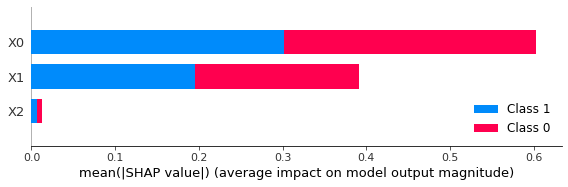

In [0]:
shap.summary_plot(rf_shap_values, test_data, feature_names=feature_cols)


In [0]:
print(test_data.shape)
print(len(feature_cols))



(5934, 3)
3


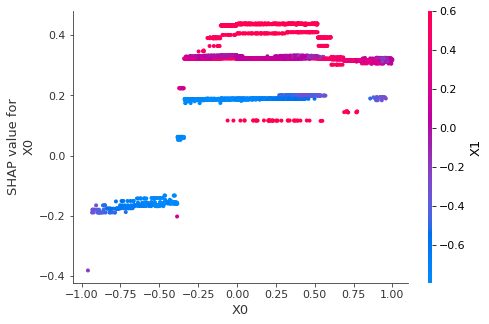

In [0]:
shap.dependence_plot(0, rf_shap_values[0], test_data, feature_names=feature_cols)

check_additivity requires us to run predictions which is not supported with spark, ignoring. Set check_additivity=False to remove this warning


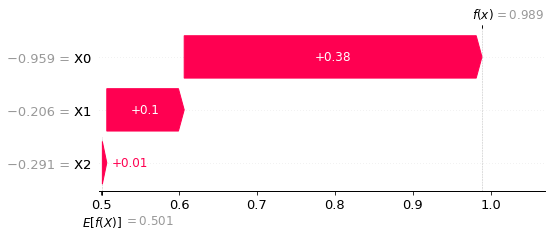

In [0]:
# Convert PySpark DataFrame to Pandas DataFrame
row_to_explain = testData.select(feature_cols).limit(1).toPandas()

# Initialize a TreeExplainer instance for the random forest model
rf_explainer = shap.TreeExplainer(rf_model)

# Generate SHAP values for the test data
rf_shap_values = rf_explainer.shap_values(row_to_explain)

# Create the waterfall plot
shap.initjs()
shap.waterfall_plot(shap.Explanation(values=rf_shap_values[1][0], base_values=rf_explainer.expected_value[1], data=row_to_explain.iloc[0]), max_display=10)

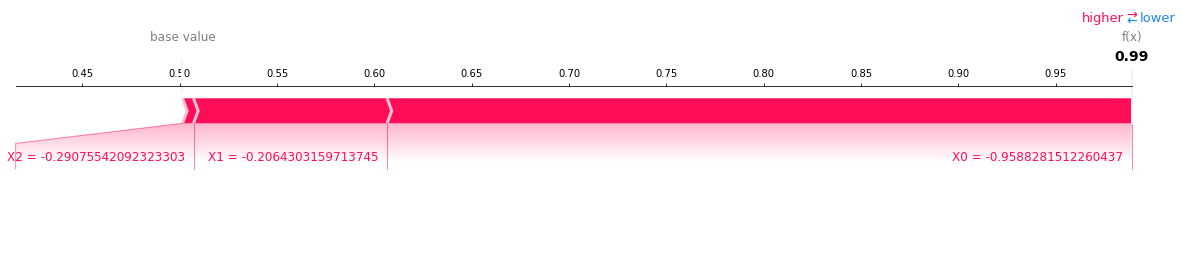

In [0]:
shap.initjs()
shap.force_plot(base_value=rf_explainer.expected_value[1], 
                shap_values=rf_shap_values[1][0], 
                features=row_to_explain.iloc[0],
                matplotlib=True)